In [38]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

In [4]:
(X_train, y_train), (X_test, y_test)= keras.datasets.mnist.load_data()

In [5]:
len(X_train)

60000

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
#X_train[0]

In [8]:
len(y_train)

60000

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

<Figure size 800x200 with 0 Axes>

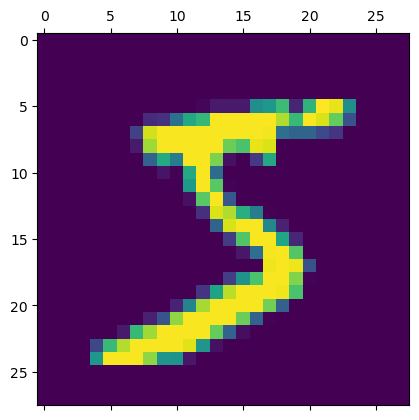

In [10]:
plt.figure(figsize=(8,2))
plt.matshow(X_train[0])

In [11]:
y_train[0]

5

<Figure size 800x200 with 0 Axes>

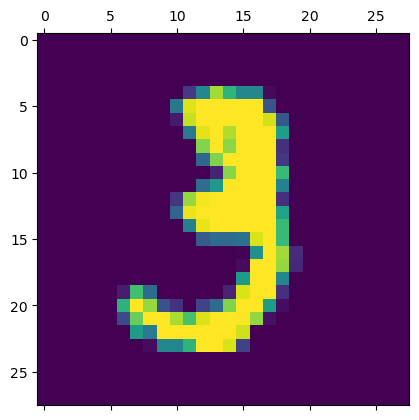

In [12]:
plt.figure(figsize=(8,2))
plt.matshow(X_train[10])

In [13]:
y_train[10]

3

In [14]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [15]:
np.unique(X_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
#Scaling the data
X_train= X_train / 255
X_test= X_test / 255

# Using only input layer and output layer without hidden layer

In [24]:
#Building the model

ann= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

ann.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4692 - accuracy: 0.8779
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3037 - accuracy: 0.9155
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2833 - accuracy: 0.9204
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2734 - accuracy: 0.9238
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2669 - accuracy: 0.9253
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2624 - accuracy: 0.9269
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2584 - accuracy: 0.9278
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2557 - accuracy: 0.9296
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2529 - accuracy: 0.9302
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.251

In [36]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2652 - accuracy: 0.9263


[0.26523616909980774, 0.9262999892234802]

313/313 [==============================] - 0s 1ms/step


Text(50.722222222222214, 0.5, 'Truth')

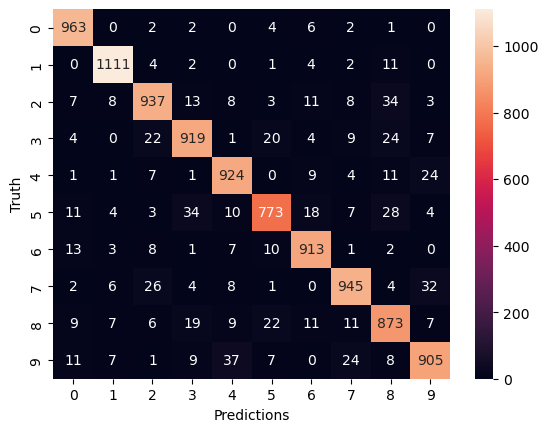

In [37]:
y_pred= ann.predict(X_test)
y_pred_labels= [np.argmax(i) for i in y_pred]

cm= tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predictions')
plt.ylabel('Truth')

In [40]:
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.92      0.91      0.92      1032
           3       0.92      0.91      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.92      0.87      0.89       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.90      0.89       974
           9       0.92      0.90      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



# Using two hidden layers

In [41]:
# flattening directly
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(600, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer= 'adam',
             loss='sparse_categorical_crossentropy',
             metrics= ['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1951 - accuracy: 0.9426
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0782 - accuracy: 0.9763
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0516 - accuracy: 0.9841
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0360 - accuracy: 0.9884
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0274 - accuracy: 0.9911
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0218 - accuracy: 0.9927
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0163 - accuracy: 0.9945
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0146 - accuracy: 0.9949
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0120 - accuracy: 0.9961
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

313/313 [==============================] - 1s 2ms/step


Text(50.722222222222214, 0.5, 'Truth')

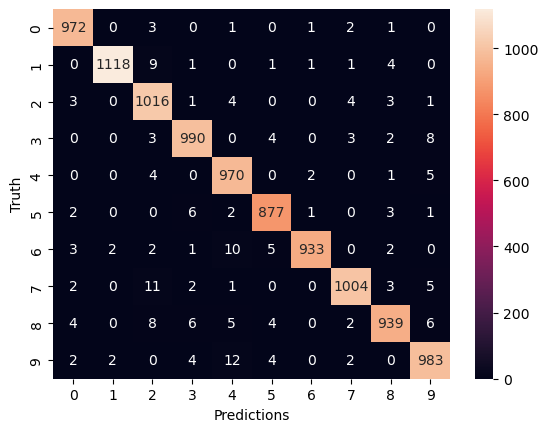

In [43]:
y_pred10= model.predict(X_test)
y_pred10_labels= [np.argmax(i) for i in y_pred10]

cm= tf.math.confusion_matrix(labels=y_test, predictions=y_pred10_labels)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predictions')
plt.ylabel('Truth')

In [44]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0895 - accuracy: 0.9802


[0.08954676985740662, 0.9801999926567078]

In [45]:
print(classification_report(y_test, y_pred10_labels))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
model.evaluate(X_test, y_test)

In [46]:
# flattening directly
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(600, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer= 'adam',
             loss='sparse_categorical_crossentropy',
             metrics= ['accuracy'])

model.fit(X_train, y_train, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1955 - accuracy: 0.9418
Epoch 2/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0771 - accuracy: 0.9767
Epoch 3/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0516 - accuracy: 0.9837
Epoch 4/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0369 - accuracy: 0.9879
Epoch 5/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0270 - accuracy: 0.9913
Epoch 6/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0197 - accuracy: 0.9935
Epoch 7/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0189 - accuracy: 0.9935
Epoch 8/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0146 - accuracy: 0.9953
Epoch 9/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0115 - accuracy: 0.9960
Epoch 10/30
1875/1875 [==============================] - 12s 6ms/step - l

In [47]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1568 - accuracy: 0.9805


[0.15676206350326538, 0.9804999828338623]

313/313 [==============================] - 1s 2ms/step


Text(50.722222222222214, 0.5, 'Truth')

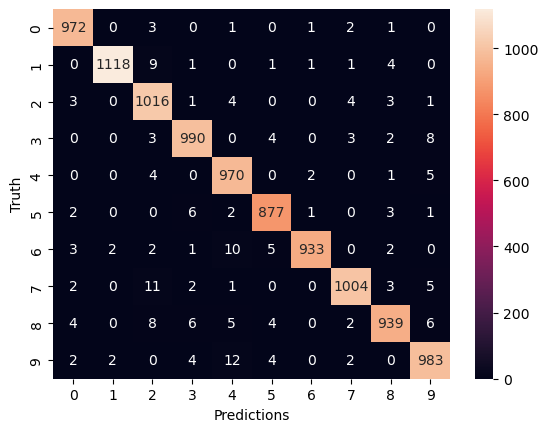

In [48]:
y_pred30= model.predict(X_test)
y_pred30_labels= [np.argmax(i) for i in y_pred10]

cm= tf.math.confusion_matrix(labels=y_test, predictions=y_pred30_labels)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predictions')
plt.ylabel('Truth')

In [49]:
print(classification_report(y_test, y_pred30_labels))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

